In [1]:
import os
import sys
import warnings
import numpy as np
import matplotlib.pylab as plt
import astropy.units as u
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
import importlib

# SAGE
import sage #import the module here, so that it can be reloaded.
importlib.reload(sage)
from sage import sage

# Mid-Res Phoenix
sys.path.append('/Users/hritam/Documents/PhD/0. PhD_Papers_posters/Figures/Notebooks/Model')
import MidRes_PHOENIX as pho

In [2]:
import matplotlib
params = {"figure.figsize": (25,12), 
"font.size": 18, 
"font.weight": "normal", 
"xtick.major.size": 6, 
"xtick.minor.size": 4,
 "ytick.major.size": 6, 
 "ytick.minor.size": 4, 
 "xtick.major.width": 1.5, 
 "xtick.minor.width": 1.5, 
 "ytick.major.width": 1.5, 
 "ytick.minor.width": 1.5, 
 "xtick.major.pad": 8, 
 "xtick.minor.pad": 8, 
 "ytick.major.pad": 8, 
 "ytick.minor.pad": 8, 
 "lines.linewidth": 1.4, 
 "lines.markersize": 10, 
 "axes.linewidth": 1.4, 
 "legend.loc": "best", 
 "text.usetex":False, 
 "xtick.labelsize" : 14, 
 "ytick.labelsize" : 14, 
 "xtick.direction": "in", 
 "ytick.direction": "in", 
 "xtick.bottom":True, 
 "xtick.top":True, 
 "ytick.left":True, 
 "ytick.right":True, } 

matplotlib.rcParams.update(params)

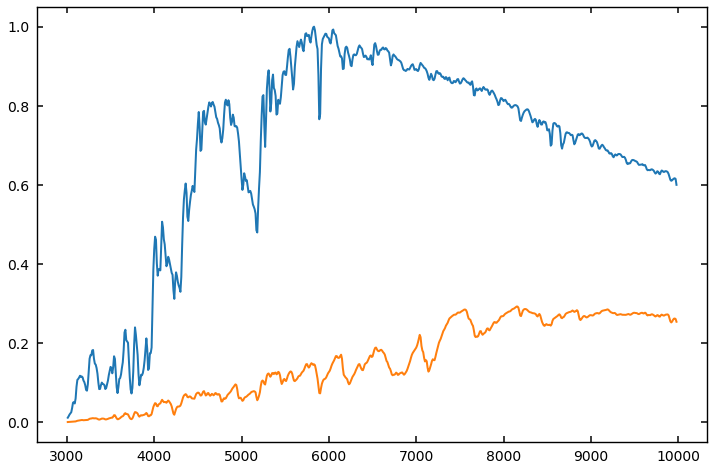

In [3]:
Teff_star= 4500
Teff_spot= 3500
logg= 4.5
M_H= 0.0

wavein  = 3000.0                       # lower limit of wavelength in Angstrom
waveout = 10000.0                      # upper limit of wavelength in Angstrom

loc_library= '/Users/hritam/Documents/PhD/Phoenix_spectrum/SolarMetallacity'

def normalised_spec(Teff_star, Teff_spot, logg, wavein, waveout, loc, delta_wave=20):
    
    # High resolution spectrum 
    phoenix_wl_star, phoenix_fl_star= pho.PHOENIX_Spectrum_extractor(Teff= Teff_star, logg= logg, wavein= wavein, waveout= waveout, loc=loc_library)
    phoenix_wl_spot, phoenix_fl_spot= pho.PHOENIX_Spectrum_extractor(Teff= Teff_spot, logg= logg, wavein= wavein, waveout= waveout, loc=loc_library)
    # Low- Resolution spectrum 
    lowres_wl_star, lowres_fl_star= pho.convolving_spectrum(phoenix_wl_star, phoenix_fl_star, delta_wave) 
    lowres_wl_spot, lowres_fl_spot= pho.convolving_spectrum(phoenix_wl_spot, phoenix_fl_spot, delta_wave)

    # Normalisation
    wavelength= lowres_wl_spot
    flux_cold= lowres_fl_spot/ max(lowres_fl_star) 
    flux_hot= lowres_fl_star/ max(lowres_fl_star)
    
    return wavelength, flux_hot, flux_cold


wavelength, flux_hot, flux_cold= normalised_spec(Teff_star= Teff_star, Teff_spot= Teff_spot, logg= logg, wavein= wavein, waveout= waveout,
                                                       loc= loc_library, delta_wave=10)

plt.figure(figsize=(12,8))
plt.plot(wavelength, flux_hot, lw=2)
plt.plot(wavelength, flux_cold, lw=2)
plt.show()

In [4]:
u1_m1, u2_m1= np.loadtxt('/Users/hritam/Documents/PhD/0. PhD_Papers_posters/Figures/Notebooks/Model/m1_ldc_new.txt').T

planet_pixel_size = 30
spotnumber = 1
spot_long= [-180]
spot_lat = [90]
spot_size = [4]
inclination= 90
ve = 100.0 #km sec^{-1}


0


<Figure size 864x720 with 0 Axes>

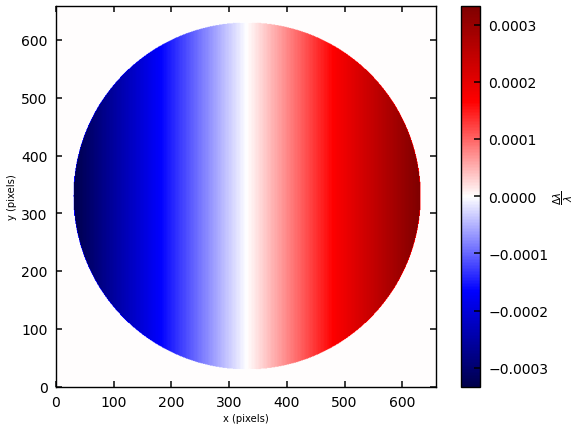

20


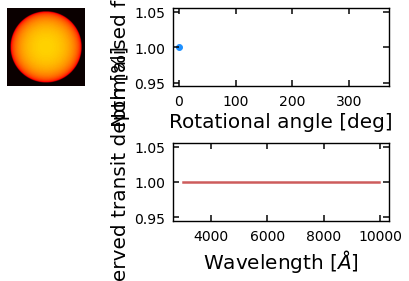

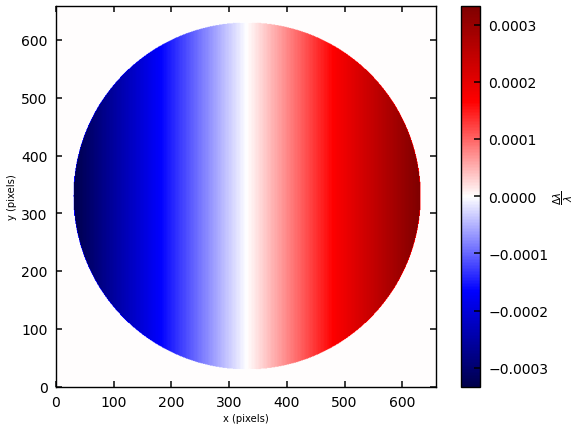

40


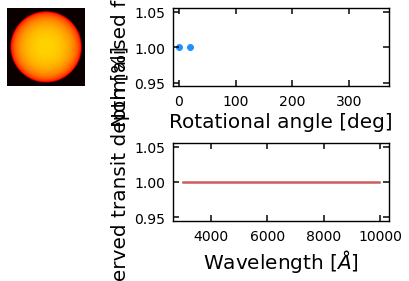

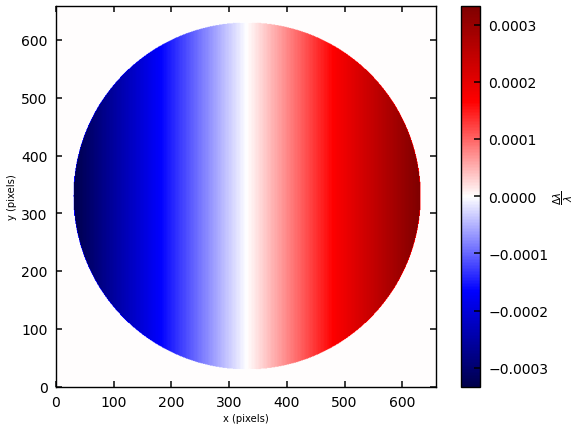

KeyboardInterrupt: 

In [5]:
# plt.style.use('dark_background')
fig = plt.figure(figsize = (12,10))
gs = gridspec.GridSpec(2,2, width_ratios = [0.5, 1], height_ratios = [1, 1])
     
ims = []


Delta_rotAngle= 20
NormFlux_arr=[]
phi_arr=[]
rotational_angle= np.arange(0, 360+Delta_rotAngle, Delta_rotAngle)

for phi in rotational_angle:
    
    # spot_long = spot_longitude
    # spot_long = spot_long + phi
    params=[phi,                                                   # Phase offset
          0.1,                                               # Radius-ratio 
          90.0,                                            # Inclination (deg)
          20.0 ,                                      # scaled semi-major axis 
          0.0,                                            # Period (days)
          0.0,                                             # Eccentricity (deg)
          0.0,                                                    # Omega (deg)
          u1_m1,                                                  # U1
          u2_m1,                                                  # U2
          2457584.329897,                           # Mid-transit point (days)
          0.0,                                      # cosine of angular distance
          0.0,                                      # Intensity profile 
          inclination]                                       # Stellar Inclination [90 deg is Face-on and 0 is edge-on] 

    final_spectrum, stellar_spectrum, contamination_factor, star_map = sage(params, planet_pixel_size, 
                                                                          
                                                                          wavelength, flux_hot, flux_cold, 
                                                                          
                                                                          spot_lat, spot_long, spot_size, ve, spotnumber, 
                                                                          'multi-color', 9200)


    lc_spec= np.sum(final_spectrum)
    lc_unspotted= np.sum(stellar_spectrum)
    NormFlux= lc_spec/ lc_unspotted
    phi_arr.append(phi)
    NormFlux_arr.append(NormFlux)

    ax1 = plt.subplot(gs[0,0])        
    img = ax1.imshow((star_map).T, cmap = cm.hot, interpolation = 'bilinear', origin = 'lower', vmin = 0.0, vmax = 1.0, animated = True)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    #ax1.set_title('$\lambda$= 3500 $\AA$', fontsize=14)

    plt.xticks([])
    plt.yticks([])


    ax2= plt.subplot(gs[0,1])
    img1 = ax2.scatter(phi_arr, NormFlux_arr, s = 35, color = 'DodgerBlue')
    ax2.set_xlim(-10, 370)
    ax2.set_xlabel('Rotational angle [deg]', fontsize=20)
    ax2.set_ylabel('Normalised flux', fontsize=20)

    
    ax3 = plt.subplot(gs[1, 1])
    img2, = ax3.plot(wavelength, contamination_factor, linewidth = 2.5, color = 'indianred')
    ax3.set_xlabel('Wavelength [$\AA$]', fontsize=20)
    ax3.set_ylabel('Observed transit depth [%]', fontsize=20)

    #ax4.set_ylabel('Stellar Contamination Factor ($\epsilon_{\lambda}$)')
    plt.tight_layout()

            
    ims.append([img, img1, img2])
        
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=False, repeat = True, repeat_delay = 0)

# Writer = animation.writers['ffmpeg']
# Writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# ani.save(f'/Users/hritam/Documents/PhD/2. SAGE/1. stellar_inclination/Results/inc_{inclination}_experiment.gif', dpi= 300)
plt.show()

#np.savetxt(f'/Users/hritam/Documents/PhD/2. SAGE/1. stellar_inclination/Results/inc_lat_{spot_lat[0]}_inc_{inclination}.dat', np.transpose([rotational_angle, NormFlux_arr]), fmt='%3.2f %3.6f')

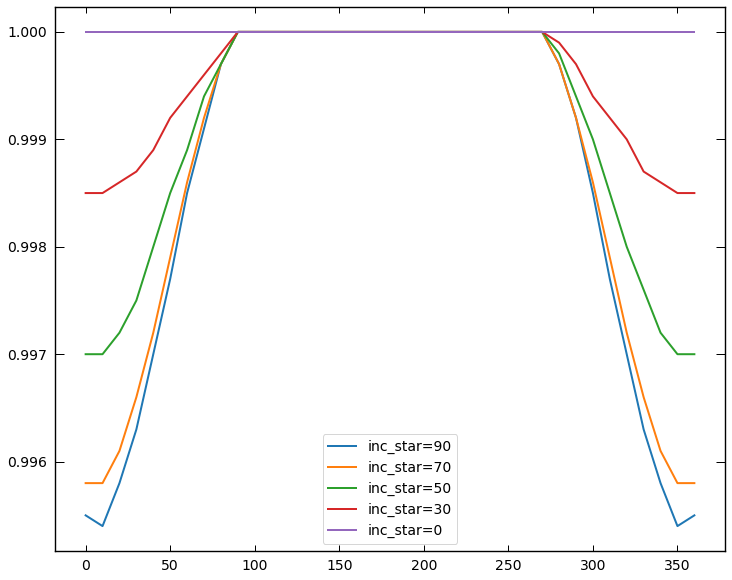

In [41]:
i_star= [90, 70, 50, 30, 0]


fig = plt.figure(figsize = (12,10))
gs = gridspec.GridSpec(1,1, width_ratios = [1], height_ratios = [1])

ax1 = plt.subplot(gs[0, 0])

for i in range(len(i_star)):
    dat= np.loadtxt(f'/Users/hritam/Documents/PhD/2. SAGE/1. stellar_inclination/Results/inc_lat_90_inc_{i_star[i]}.dat').T
    ax1.plot(dat[0], np.round(dat[1], 4), label= f'inc_star={i_star[i]}', lw = 2)

plt.legend()
# ax3.plot(wavelength, contamination_factor, linewidth = 1.5, color = 'indianred')
# ax3.set_xlabel('Wavelength [$\AA$]', fontsize=20)
# ax3.set_ylabel('Observed transit depth [%]', fontsize=20)
